In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




In [2]:
sc.settings.figdir = "sfig6"



In [3]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_lesional11.h5ad'
adata_lesional=sc.read_h5ad(PATH)


In [4]:
adata_i=adata_lesional[adata_lesional.obs["Patient_status2"]=="Neurofibroma"]
 

In [5]:
counts = adata_i.obs["test13"].value_counts()
categories_to_keep = counts[counts >= 10].index
adata_i = adata_i[adata_i.obs["test13"].isin(categories_to_keep)].copy()


# fig 6a

In [6]:
neurof = {"Fibroblast general": ["PDGFRA", "LUM", "DCN"],
           'F2/3: Bridge': ['CXCL12', 'APOE', 'EFEMP1', #'GGT5', 
                                    "APOC1", "C7", "PLA2G2A",   'PPARG', 
                                          #'IL1RL1', 'MARCH3', 'PCSK1', 
                                          
                                          
                                          # "FMO1", 
                                          
                                   # "PPARG", "TNFSF14"
                           "MYOC", "GDF10", # "LINC-PINT", 
                             # "POU3F3", 
                                  # "TNNT3", 
                    ],
                      "F5+: RAMP1": ["RAMP1", "RELN", 'PLEKHA6',  "IGFBP2", 'SFRP1', #"COL26A1", #"TAC1"
                                   ], #"CPE", "PTN", "IGF1", 

 'F5: NGFR+': [  'EBF2', "NGFR",  'SFRP4',# "TENM2", #"TM4SF1", "ANGPTL7",  
               "ITGA6", "CDH19",  "CLDN1", #"FOXS1", #"SOX17",
                 #"CAVIN2", "SFRP5", #"TNNC1"
                
                     ],
           "F5 Unique": [ 'PLEKHA6','EBF2', 'TENM2','PEAR1',  #'APOD', 'CYP1B1',
                      ],
           
          
         #  'endoneurial NAF': ['SOX9', 'OSR2', 'P4HB', 'CSPG4', 'CD34', "PDGFRB"],
        #   'perineurial NAF': ['SLC2A1', 'ITGA6',],
         
        #   "Pericyte": ["RGS5"]
          }
sc.settings.set_figure_params(dpi=600, facecolor="white", frameon=False, figsize=(8,8))

sc.pl.dotplot(
    adata_i,
    neurof, cmap="Reds",
    groupby="test13",vmax=1,colorbar_title='Mean expression\n(variance scaled)',
    standard_scale="var", 
    dendrogram=False,
    save="supp6a_neurofibroma.pdf"
)   

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

In [7]:
F23_NAME="F2/3: Perivascular"

In [8]:
adata_i.obs['test13'].unique()

['F5: NGFR+', 'F5: RAMP1+', 'F2/3: Perivascular']
Categories (3, object): ['F2/3: Perivascular' < 'F5: RAMP1+' < 'F5: NGFR+']

In [9]:
custom_colors = {    'F1: Superficial': '#ffef5a',
    'F2/3: Perivascular': '#364f99',
    'F2: Universal': '#91bae2',
    'F3: FRC-like': '#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: RAMP1+': '#4b2657',
     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
                               }



/tmp/ipykernel_14217/2263679616.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


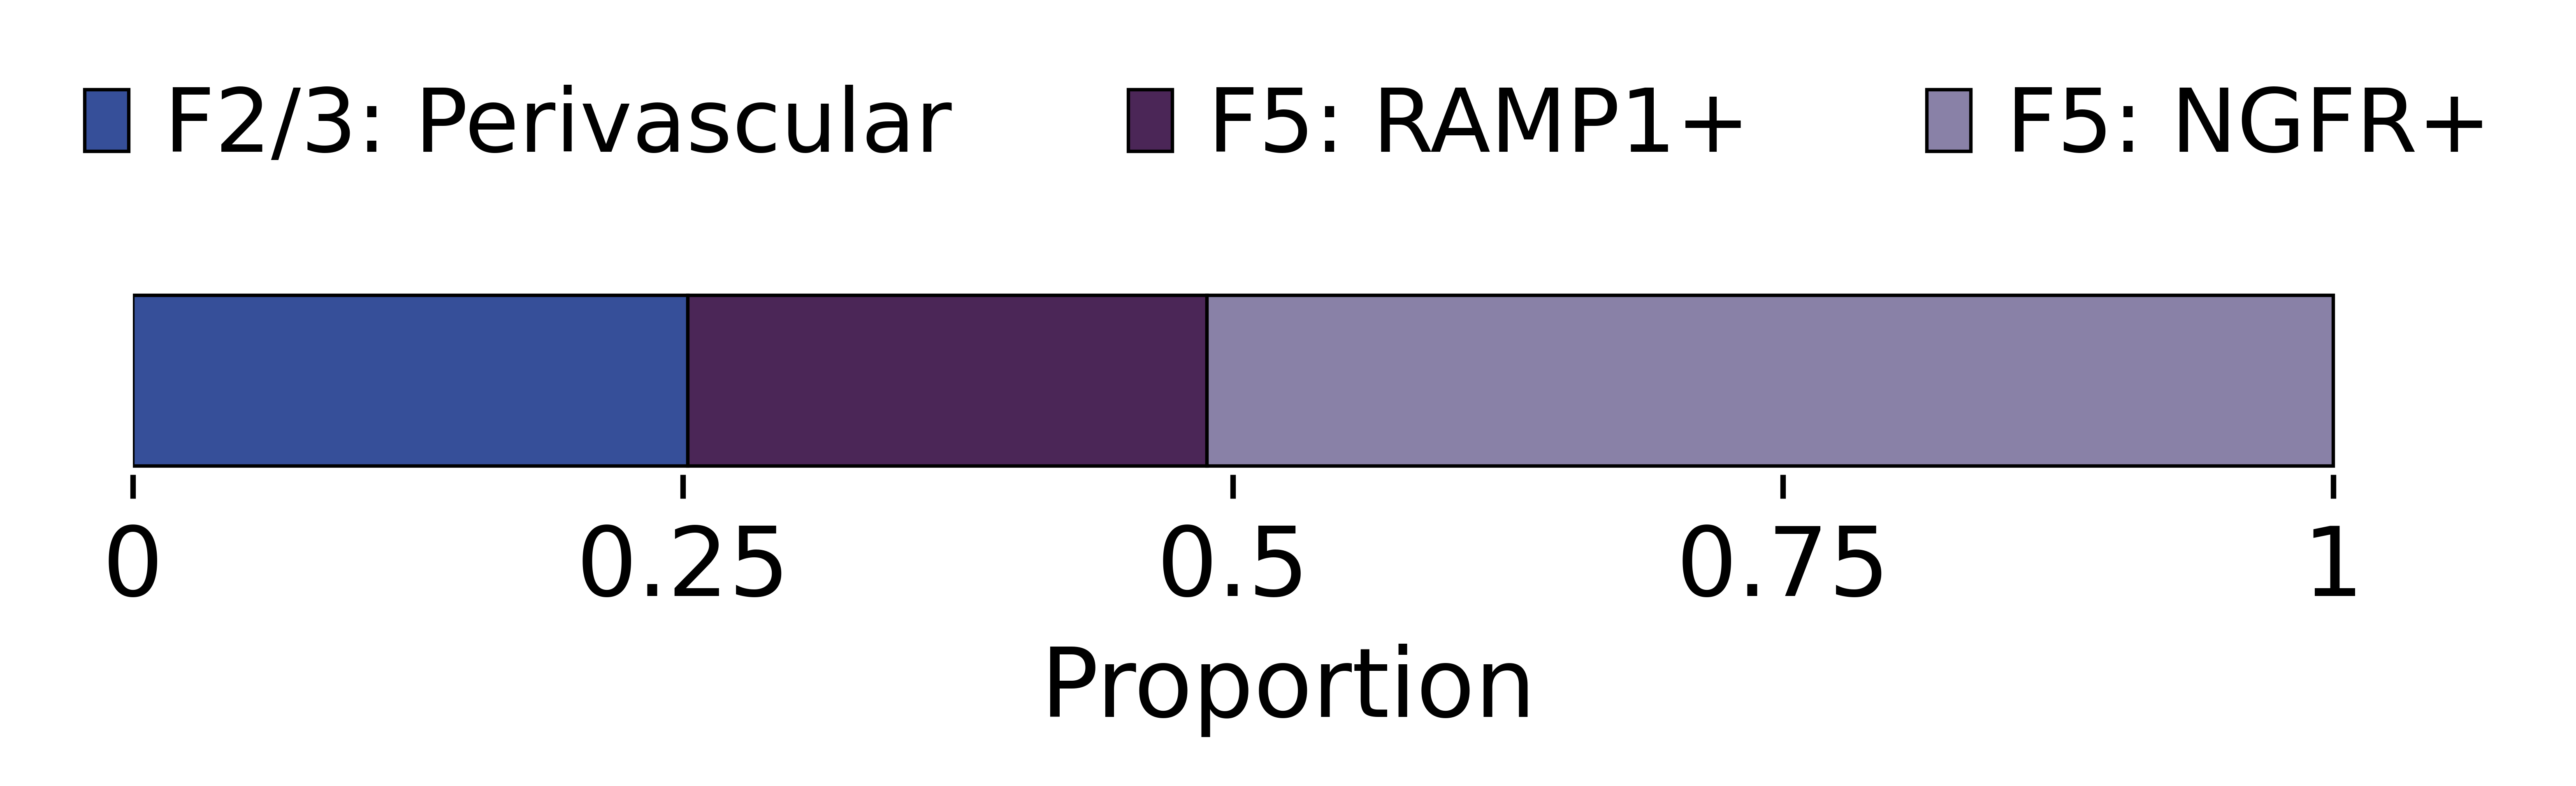

In [10]:
desired_order = [F23_NAME, 'F5: RAMP1+', 'F5: NGFR+']

proportions = adata_i.obs['test13'].value_counts(normalize=True)

proportions_filtered = proportions[proportions.index != 'Nonspecific']

proportions_filtered = proportions_filtered.reindex(desired_order).dropna()

fig, ax = plt.subplots(figsize=(6, 0.5))

previous_proportion = 0
for proportion, label in zip(proportions_filtered, proportions_filtered.index):
    color = custom_colors.get(label, '#D3D3D3')  # Default color for 'Other'
    ax.barh([1], [proportion], left=previous_proportion, color=color, label=label,
            linewidth=0.5, edgecolor='black')
    previous_proportion += proportion

# Adjust legend order based on desired_order
handles, labels = ax.get_legend_handles_labels()
ordered_handles = [handles[labels.index(l)] for l in desired_order if l in labels]

ax.legend(ordered_handles, desired_order, loc='lower center', bbox_to_anchor=(0.5, 1.2),
          ncol=len(ordered_handles), frameon=False)

ax.set_yticks([])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('Proportion')
ax.grid(False)
plt.tight_layout()
fig.savefig("sfig6/supp6a_2.pdf", dpi=300, bbox_inches="tight", format="pdf")

plt.show()

# s fig 6h

In [11]:
sc.settings.figdir = "sfig6"


In [12]:
adata=adata_lesional

In [13]:
# # adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11')
# # adata.obs["Site_status_binary"].value_counts()
# PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_all.h5ad'
# adata=sc.read_h5ad(PATH)
# adata.obs["Site_status_binary"].value_counts()
RENAME = {"Eczema": "Atopic dermatitis"}
adata.obs["Patient_status3"] = adata.obs["Patient_status3"].map(RENAME).fillna(adata.obs["Patient_status3"] )


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


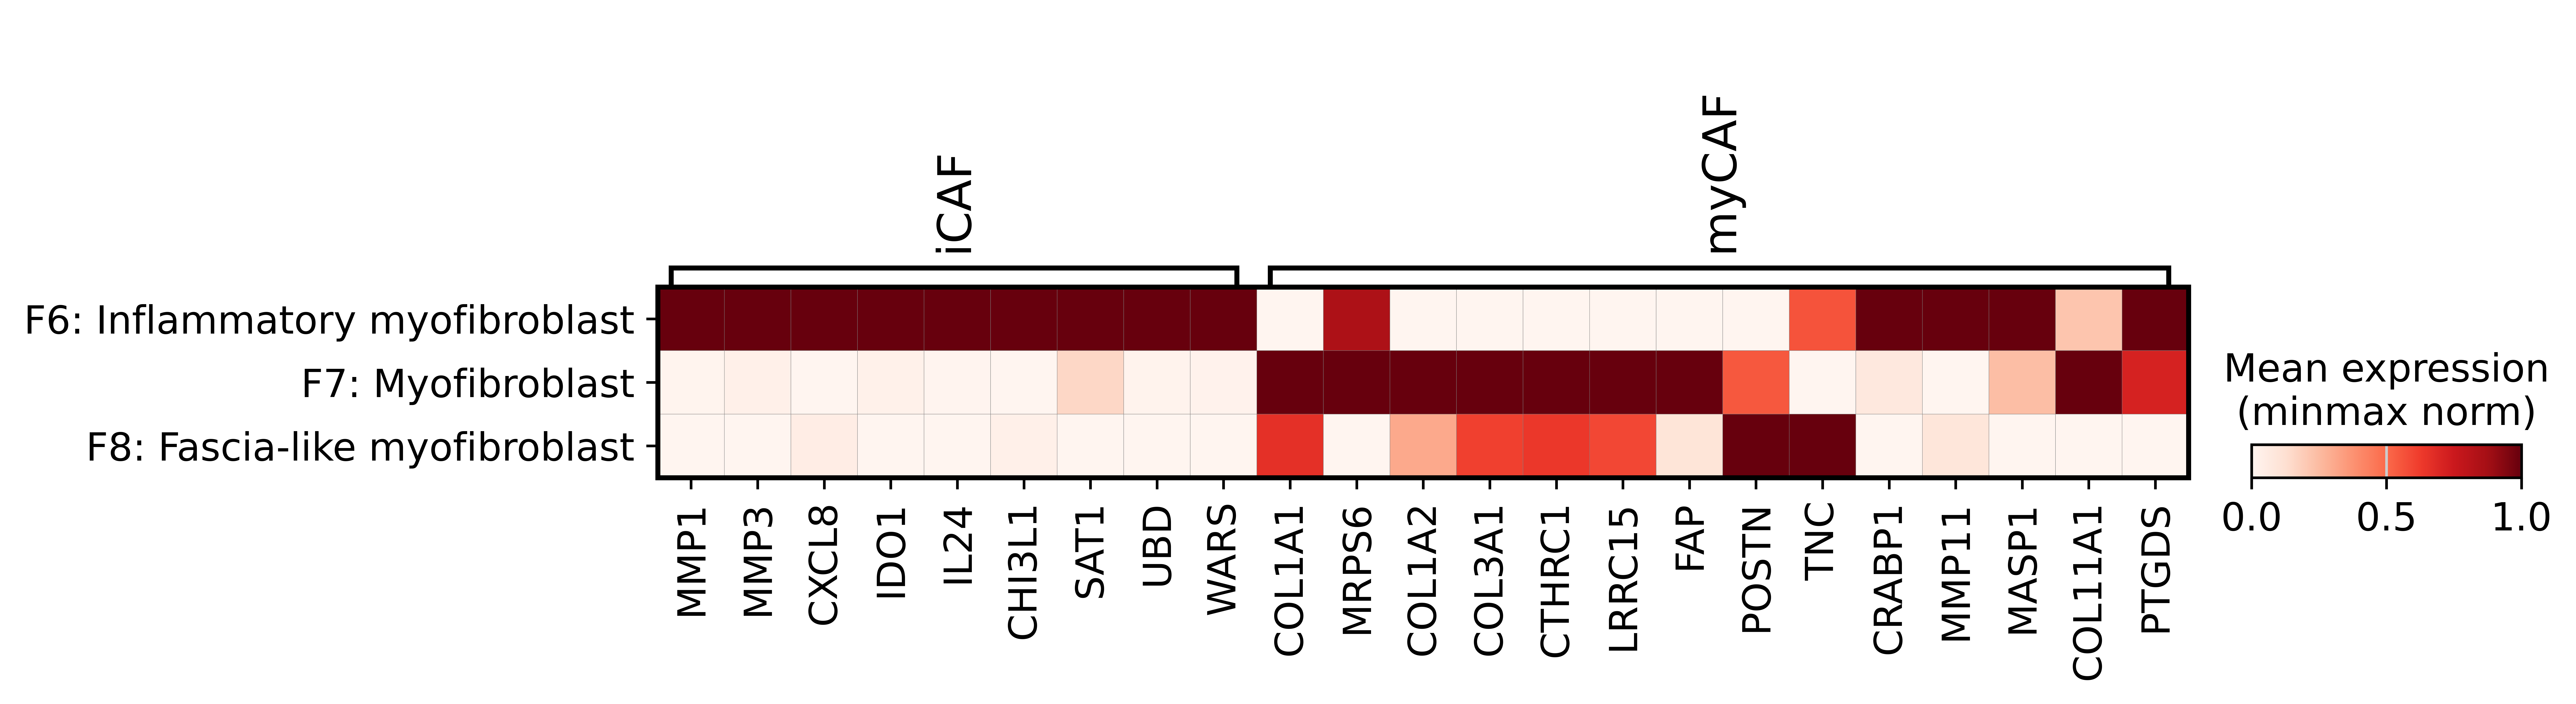

In [14]:
CAF_GENES = {"myCAF": ["COL1A1", "MRPS6", 'COL1A2', "COL3A1", "CTHRC1", "LRRC15", "FAP", "POSTN", "TNC", "CRABP1","MMP11","MASP1", "COL11A1", "PTGDS" ],
             "iCAF": ['MMP1', 'MMP3', 'CXCL8', 'IDO1', 'IL24', 'CHI3L1', 'SAT1', 'UBD', 'WARS'],
            }
adata_lesional2 = adata[(adata.obs["test13"].str.startswith("F6")) | 
                        (adata.obs["test13"].str.startswith("F8")) |
                                 (adata.obs["test13"].str.startswith("F7")) 
                                ]

CAF_GENES = {
             "iCAF": ['MMP1', 'MMP3', 'CXCL8', 'IDO1', 'IL24', 'CHI3L1', 'SAT1', 'UBD', 'WARS'],
    "myCAF": ["COL1A1", "MRPS6", 'COL1A2', "COL3A1", "CTHRC1", "LRRC15", "FAP", "POSTN", "TNC", "CRABP1","MMP11","MASP1", "COL11A1", "PTGDS" ],
            }
sc.pl.matrixplot(
    adata_lesional2,
    CAF_GENES,
    groupby="test13",
    standard_scale="var",
    vmax=1,#colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
        cmap="Reds",
    colorbar_title="Mean expression\n(minmax norm)",
    #swap_axes=True,
    save='sf6c_mycaf_icaf_hoz.pdf'
   # dot_max=1,
) 
 

# fig 3i

In [15]:
LESIONAL_GENES_VSHORT5 = {'F3': ['CCL19', 'CD74', 'CH25H'],
#  'F1': ['COL18A1',
#   'COL23A1',
#   'COL13A1',
#   'COMP',
#   'NKD2',
#   'CRABP1',
#   'TNFRSF21',
#   'CXCL1'],
 'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
 'F6: Myofibroblast inflammatory': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11'],
                         }

xtick_order_orig=["Dupuytren contracture",
 'Keloid scar',
 'Morphoea (pansclerotic)',
 'Systemic sclerosis',
 'Non-keloid scar',
 'Basal cell carcinoma',
 'Squamous cell carcinoma',
 'Acral melanoma',
 'Cutaneous melanoma',
 'Sarcoidosis',
 'Granuloma annulare',
 'Hidradenitis suppurativa',
 'Lupus (DLE)',
 'Acne',
 'Psoriasis',
 'Eczema',
 'Prurigo nodularis',
 'Drug reaction: lichenoid',
 'Drug reaction: DRESS',
 'Lupus (SCLE)',
 'Alopecia areata',
  'Erythema migrans',
 'Neurofibroma']
 

In [16]:
flat_genes = [gene for gene_list in LESIONAL_GENES_VSHORT5.values() for gene in gene_list]

CAF_AND_F6 = {"iCAF": CAF_GENES["iCAF"],
             "Other F6 Markers": [x for x in flat_genes if x not in CAF_GENES["iCAF"]]
             }


for x in [ 'F6: Inflammatory myofibroblast']: 
    adata_i = adata[adata.obs["test13"] == x]
    adata_i.obs['disease_category'] = adata_i.obs['disease_category'].str.strip()
    adata_i.obs['disease_category'] = adata_i.obs['disease_category'].str.replace(r'\n', ' ', regex=True)
    #adata_i=adata_i[adata_i.obs.disease_category=="Cancer"]
    print(adata_i.shape)
    print(adata_i.obs['disease_category'].value_counts())
    counts = pd.Series(adata_i.obs['disease_category']).value_counts()
    #counts.index = counts.index.str.replace(r'\n', ' ', regex=True)

    #filtered_counts = counts[counts > 100]
    #filtered_categories = filtered_counts.index.tolist()

    #xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]
    #xtick_order_with_counts = [   f"{category} (n={filtered_counts[category]})" for category in xtick_order_filtered ]
    #adata_i_filtered = adata_i[adata_i.obs['disease_category'].isin(filtered_categories)]
    #adata_i.obs['disease_category_with_counts'] = adata_i.obs['disease_category'].map(  lambda x: f"{x} (n={filtered_counts[x]})")

    sc.pl.dotplot(
        adata_i,
           CAF_AND_F6,
        groupby="disease_category",
        standard_scale="var",colorbar_title='Mean expression\n(minmax norm)',
        cmap="Reds",
         categories_order=['Inflammatory+ low scarring risk', 'Inflammatory+ high scarring risk',
                          'Cancer',
 'Fibrotic/scarring' ],
        #categories_order=xtick_order_with_counts,
                save="s6e_f6_heterogeneity.pdf"

    )

/tmp/ipykernel_14217/3676048820.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['disease_category'] = adata_i.obs['disease_category'].str.strip()


(6157, 36601)
disease_category
Cancer                              2552
Inflammatory+ high scarring risk    1308
Fibrotic/scarring                   1162
Inflammatory+ low scarring risk     1135
Name: count, dtype: int64


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

In [ ]:
sc.logging.print_versions()


